Bibliotecas:

- pandas
- datetime
- matplotlib
- numpy


 Puxar cotações e afins:

- pandas_datareader
- yfinance

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import yfinance

yfinance.pdr_override()

### Importe de  arquivo .xlsx de carteira de investimentos.

In [2]:
df_carteira = pd.read_excel(r"C:\Projetos\Dados\analise-carteira-investimento\Carteira.xlsx")

## display(df_carteira)

### Definição de período de análise 

In [3]:
data_inicial = datetime.now() - timedelta(days=30)
data_final   = datetime.now()

print(data_inicial, data_final)

2024-01-01 13:25:16.576392 2024-01-31 13:25:16.576392


## Coleta Automática de Dados: O sistema busca automaticamente dados históricos de preços de ações e do Índice BOVESPA, eliminando a necessidade de entrada manual.

In [4]:
df_ibov = pdr.get_data_yahoo("^BVSP", data_inicial, data_final)['Adj Close']
display(df_ibov)

[*********************100%%**********************]  1 of 1 completed


Date
2024-01-02    132697.000000
2024-01-03    132834.000000
2024-01-04    131226.000000
2024-01-05    132023.000000
2024-01-08    132427.000000
2024-01-09    131447.000000
2024-01-10    130841.000000
2024-01-11    130649.000000
2024-01-12    130988.000000
2024-01-15    131521.000000
2024-01-16    129294.000000
2024-01-17    128524.000000
2024-01-18    127316.000000
2024-01-19    127636.000000
2024-01-22    126602.000000
2024-01-23    128263.000000
2024-01-24    127816.000000
2024-01-25    128169.000000
2024-01-26    128967.000000
2024-01-29    128503.000000
2024-01-30    127402.000000
2024-01-31    128819.359375
Name: Adj Close, dtype: float64

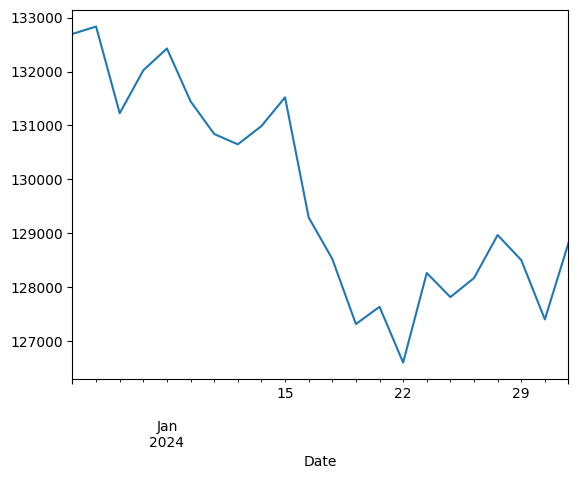

In [5]:
df_ibov.plot()
plt.show()

### Padronizando cotações e preenchedo valores vazios

In [6]:
lista_ativos = list(df_carteira['Ativos'].astype(str)+ '.SA')
df_cotacoes = pdr.get_data_yahoo(lista_ativos, data_inicial, data_final)['Adj Close']
display(df_cotacoes)

[*********************100%%**********************]  13 of 13 completed


,BBDC4.SA,BCRI11.SA,BOVA11.SA,BPAC11.SA,ENEV3.SA,ITUB4.SA,KNRI11.SA,MGLU3.SA,MOVI3.SA,NTCO3.SA,SMAL11.SA,VILG11.SA,XPLG11.SA
Date,,,,,,,,,,,,,
2024-01-02,16.731026,74.089996,128.759995,37.078957,13.29,33.520000,165.149994,2.05,11.10,16.690001,109.910004,98.400002,108.830002
2024-01-03,16.750000,75.900002,128.990005,36.391758,13.31,33.150002,165.460007,2.00,11.29,16.760000,109.900002,97.010002,109.000000
2024-01-04,16.520000,75.500000,127.349998,35.959999,13.30,32.930000,164.800003,1.93,11.03,16.150000,107.790001,96.669998,109.239998
2024-01-05,16.879999,75.370003,128.250000,36.730000,13.51,33.700001,164.440002,1.97,11.32,16.309999,108.849998,96.050003,109.919998
2024-01-08,16.750000,75.459999,128.570007,37.910000,13.52,33.340000,163.839996,2.09,11.95,16.450001,110.610001,96.480003,109.989998
2024-01-09,16.299999,75.349998,127.589996,37.779999,13.30,33.320000,163.740005,2.14,11.73,16.379999,110.339996,96.029999,109.900002
2024-01-10,16.020000,75.349998,126.940002,37.759998,12.98,33.290001,165.800003,2.18,11.29,16.760000,109.599998,93.459999,109.900002
2024-01-11,15.940000,75.550003,126.809998,37.490002,12.73,33.349998,164.500000,2.18,10.67,16.719999,109.220001,93.250000,109.889999
2024-01-12,15.810000,76.000000,127.230003,38.340000,12.75,33.389999,164.750000,2.26,10.47,16.910000,109.699997,93.800003,109.739998


In [7]:
df_cotacoes.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2024-01-02 to 2024-01-31
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BBDC4.SA   22 non-null     float64
 1   BCRI11.SA  22 non-null     float64
 2   BOVA11.SA  22 non-null     float64
 3   BPAC11.SA  22 non-null     float64
 4   ENEV3.SA   22 non-null     float64
 5   ITUB4.SA   22 non-null     float64
 6   KNRI11.SA  22 non-null     float64
 7   MGLU3.SA   22 non-null     float64
 8   MOVI3.SA   22 non-null     float64
 9   NTCO3.SA   22 non-null     float64
 10  SMAL11.SA  22 non-null     float64
 11  VILG11.SA  22 non-null     float64
 12  XPLG11.SA  22 non-null     float64
dtypes: float64(13)
memory usage: 2.4 KB


In [8]:
df_cotacoes = df_cotacoes.ffill()

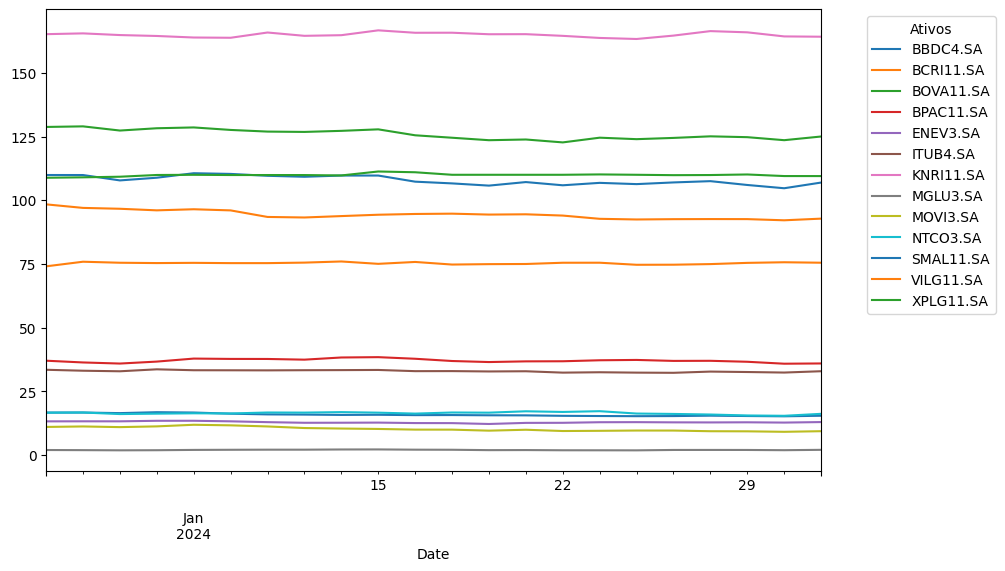

In [9]:
ax = df_cotacoes.plot(figsize=(10, 6))
ax.legend(title='Ativos', bbox_to_anchor=(1.05, 1), loc='upper left')


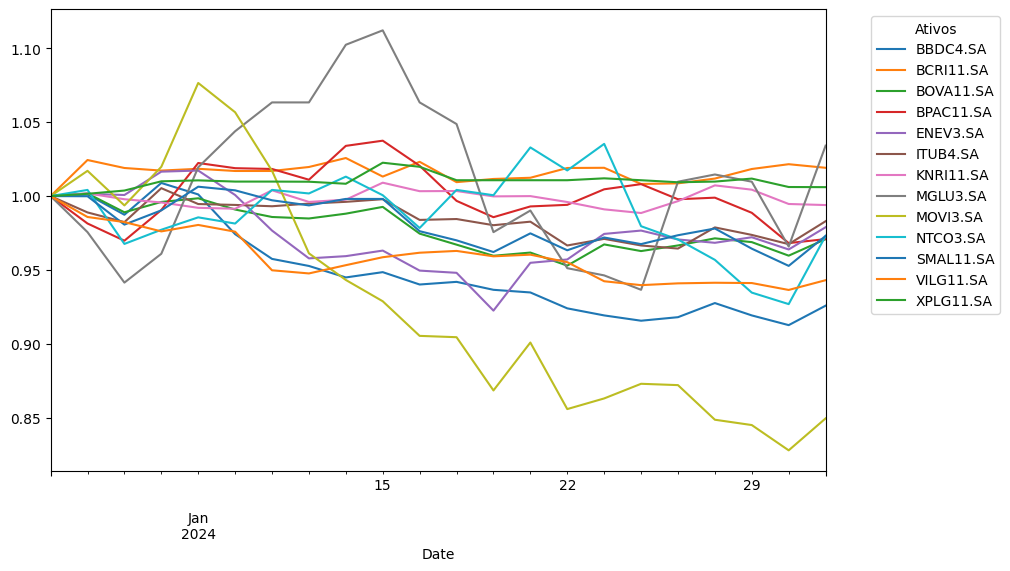

In [10]:
df_cotacoes_norm = df_cotacoes / df_cotacoes.iloc[0]
axx = df_cotacoes_norm.plot(figsize=(10, 6))
axx.legend(title='Ativos', bbox_to_anchor=(1.05, 1), loc='upper left')


### Criação de df_investimento de acordo com quantidade de ações. Mas somar de valor investido

In [11]:
df_investimento = pd.DataFrame()

for ativo in df_carteira['Ativos']:
    qtd_acoes = df_carteira.loc[df_carteira["Ativos"] == ativo, "Qtde"].values[0]
    df_investimento[ativo] = qtd_acoes * df_cotacoes[f"{ativo}.SA"] 
  
df_investimento['Total'] = df_investimento.sum(axis=1)
display(df_investimento)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11,Total
Date,,,,,,,,,,,,,,
2024-01-02,12875.999451,10991.000366,204.999995,1673.102570,10056.000137,1328.999996,1110.000038,3707.895660,1669.000053,7408.999634,9840.000153,16514.999390,10883.000183,88263.997626
2024-01-03,12899.000549,10990.000153,200.000000,1675.000000,9945.000458,1331.000042,1128.999996,3639.175797,1676.000023,7590.000153,9701.000214,16546.000671,10900.000000,88221.178055
2024-01-04,12734.999847,10779.000092,192.999995,1652.000046,9879.000092,1330.000019,1102.999973,3595.999908,1614.999962,7550.000000,9666.999817,16480.000305,10923.999786,87502.999842
2024-01-05,12825.000000,10884.999847,197.000003,1687.999916,10110.000229,1351.000023,1131.999969,3672.999954,1630.999947,7537.000275,9605.000305,16444.000244,10991.999817,88070.000529
2024-01-08,12857.000732,11061.000061,208.999991,1675.000000,10002.000046,1352.000046,1194.999981,3790.999985,1645.000076,7545.999908,9648.000336,16383.999634,10998.999786,88364.000583
2024-01-09,12758.999634,11033.999634,214.000010,1629.999924,9995.999908,1330.000019,1172.999954,3777.999878,1637.999916,7534.999847,9602.999878,16374.000549,10990.000153,88053.999305
2024-01-10,12694.000244,10959.999847,218.000007,1602.000046,9987.000275,1297.999954,1128.999996,3775.999832,1676.000023,7534.999847,9345.999908,16580.000305,10990.000153,87791.000438
2024-01-11,12680.999756,10922.000122,218.000007,1593.999958,10004.999542,1272.999954,1067.000008,3749.000168,1671.999931,7555.000305,9325.000000,16450.000000,10988.999939,87499.999690
2024-01-12,12723.000336,10969.999695,225.999999,1581.000042,10016.999817,1275.000000,1047.000027,3834.000015,1690.999985,7600.000000,9380.000305,16475.000000,10973.999786,87793.000007


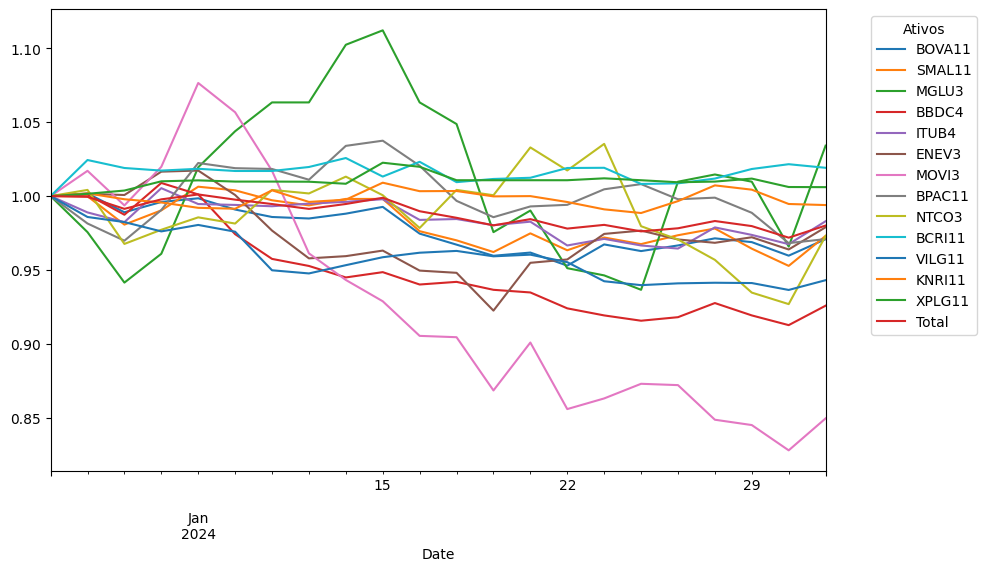

In [12]:
df_investimento_nomr = df_investimento / df_investimento.iloc[0]

ax_df_ivestimento_norm = df_investimento_nomr.plot(figsize=(10, 6))
ax_df_ivestimento_norm.legend(title='Ativos', bbox_to_anchor=(1.05, 1), loc='upper left')

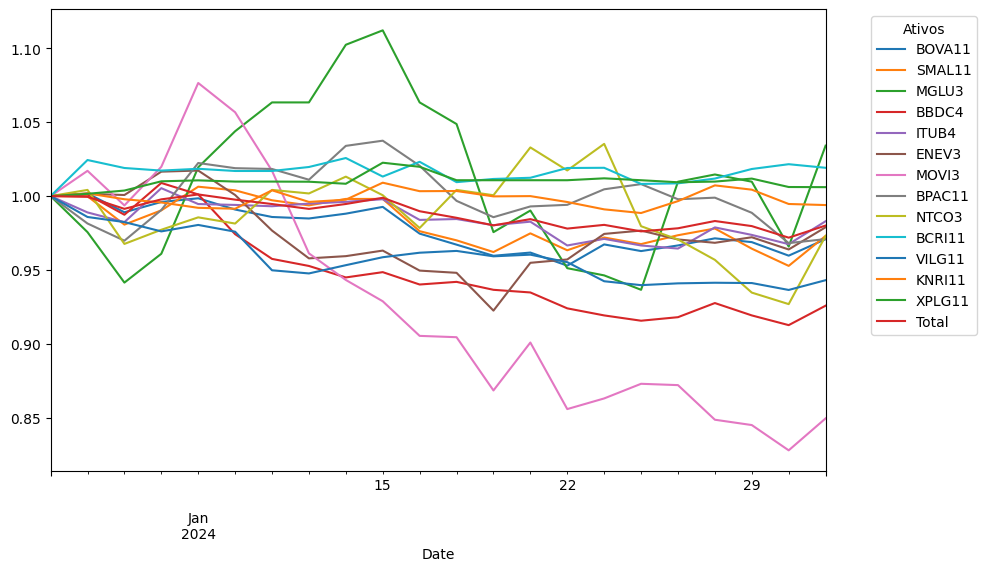

In [13]:
df_ibov_norm = df_ibov / df_ibov.iloc[0]
ax_df_ibov_norm = df_investimento_nomr.plot(figsize=(10, 6))
ax_df_ibov_norm.legend(title='Ativos', bbox_to_anchor=(1.05, 1), loc='upper left')

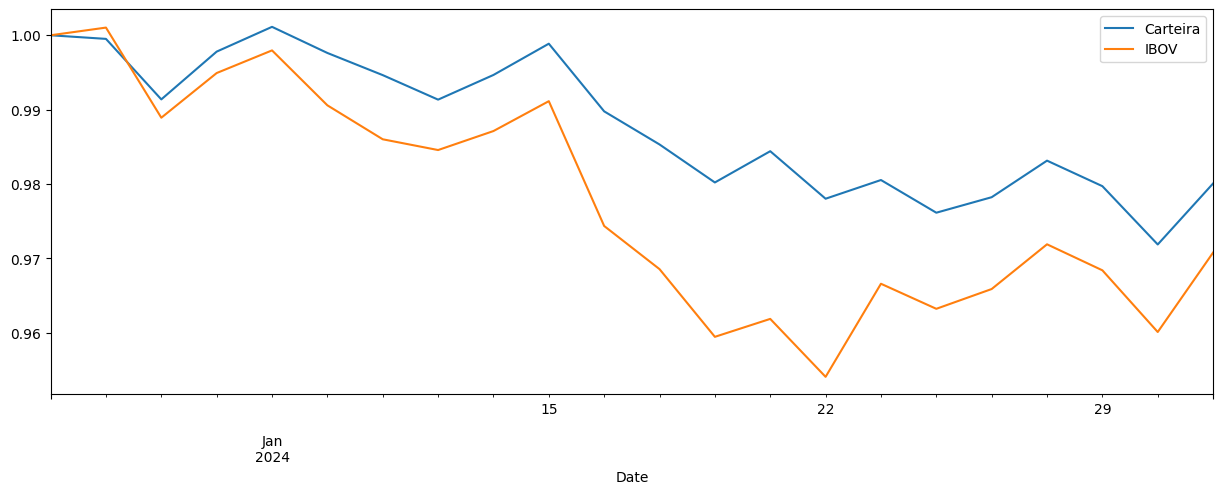

In [14]:
df_investimento_nomr['Total'].plot(label='Carteira', figsize=(15,5))
df_ibov_norm.plot(label='IBOV')
plt.legend()
plt.show()

### Calculando retorno  e correlação

In [21]:
retorno_ibov = df_ibov_norm[-1] -1
retorno_carteira = df_investimento_nomr["Total"][-1]-1

print(f'Retorno do IBOV: {retorno_ibov:.2%}')
print(f'Retorno Carteira: {retorno_carteira:.2%}')

Retorno do IBOV: -2.92%
Retorno Carteira: -1.99%


C:\Users\amand\AppData\Local\Temp\ipykernel_9132\3955155874.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_ibov = df_ibov_norm[-1] -1
C:\Users\amand\AppData\Local\Temp\ipykernel_9132\3955155874.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_carteira = df_investimento_nomr["Total"][-1]-1
